# Splitting methods

In [2]:
# author: Christian Offen
# accompanying source code for the handbook article 
# "Solving ODEs for Nonlinear Dynamics with Symplectic and Geometric Integration" within "Handbook on Nonlinear Dynamics. Volume 2 Numerical Methods", World Scientific, editor: Vincent Acary

In [4]:
using Plots
using LinearAlgebra
using LaTeXStrings

In [5]:
# generic function to apply 1-step function iteratively
function Iterator(F,y0,steps::Int)
    y = zeros(length(y0),steps+1)
    y[:,1] = y0
    for k=1:steps
        y[:,k+1] = F(y[:,k])
    end
    return y
end

Iterator (generic function with 1 method)

## Particle in a potential field

In [7]:
# see section 4.2 Splitting methods

In [10]:
# splitting method for differential equation
# q' = M^(-1)p
# p' = - gradU(q)

M = 1.0 # mass matrix
gradU(x) = x # gradient of potential

# exact solution to ode when either q or p is frozen
# h refers to step size, z refers to the initial value
Phi1(h,z) = [z[1] + h*(M\z[2]); z[2]]  # flow of first vector field
Phi2(h,z) = [z[1], z[2] - h*(M\z[1])]  # flow of second vector field

Phi2 (generic function with 1 method)

In [11]:
# Lie-Trotter and Strang composition of exact flows to approximate exact solution
LieTrotterStep(h,z) = Phi2(h,Phi1(h,z))
StrangStep(h,z) = Phi1(h/2,Phi2(h,Phi1(1/2*h,z)))

StrangStep (generic function with 1 method)

## numerical experiment

In [14]:
h = 0.2 # step size
y0 = [1.,0] # initial value
steps = 100; # number of steps

In [16]:
t = 0:h:h*steps # time mesh
yTrotter = Iterator(y-> LieTrotterStep(h,y),y0,steps) # iterative application of LieTrotter method
yStrang = Iterator(y-> StrangStep(h,y),y0,steps); # iterative application of Strang method

In [17]:
# reference for M=1, gradU=x
yRef=[cos.(t)'; -sin.(t)'];

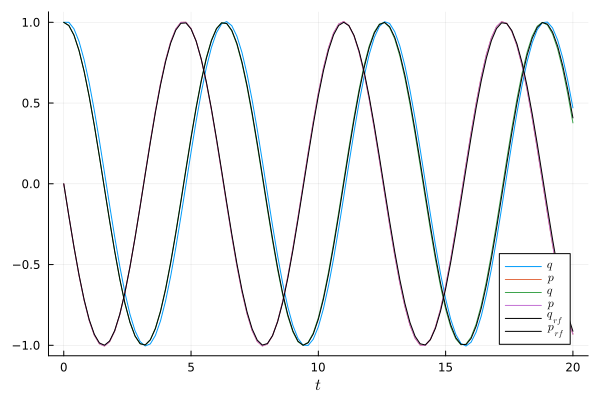

In [18]:
# plotting commands dynamics of q and p
plot(t,yTrotter',label=[L"q" L"p"],xlabel=L"t")
plot!(t,yStrang',label=[L"q" L"p"])
plot!(t,yRef',label=[L"q_{rf}" L"p_{rf}"], color=:black)

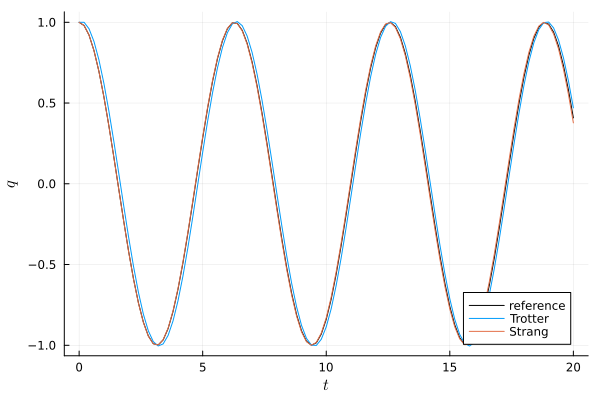

In [19]:
# plotting commands dynamics of q only
pp0=plot(xlabel=L"t",ylabel=L"q")
pp0=plot!(t,yRef[1,:],label="reference", color=:black)
pp0=plot!(t,yTrotter[1,:],label="Trotter",color=:1)
pp0=plot!(t,yStrang[1,:],label="Strang",color=:2)

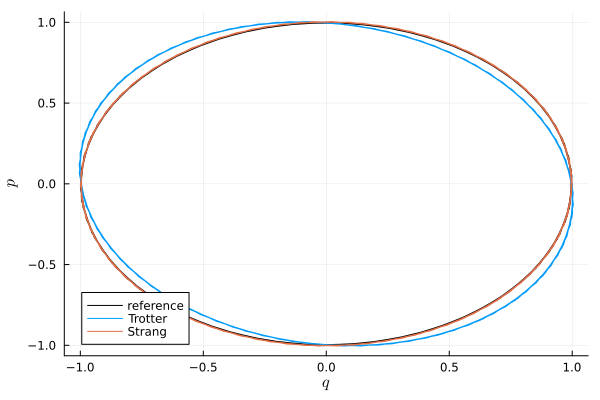

In [20]:
## plotting commands phase plot
pp=plot(yRef[1,:],yRef[2,:],xlabel=L"q",ylabel=L"p",label="reference",color=:black)
pp=plot!(yTrotter[1,:],yTrotter[2,:],xlabel=L"q",ylabel=L"p",label="Trotter",color=:1)
pp=plot!(yStrang[1,:],yStrang[2,:],xlabel=L"q",ylabel=L"p",label="Strang",color=:2)